In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### Ensemble Learning:
- Multiple machine learning used at the same time to create new algorithm
<img src="Images/11_1_algorithm.JPG" width="450">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/ML_a_z/Social_Network_Ads.csv")

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [7]:
# Split:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=0)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
# Create classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [12]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[64,  4],
       [ 3, 29]])

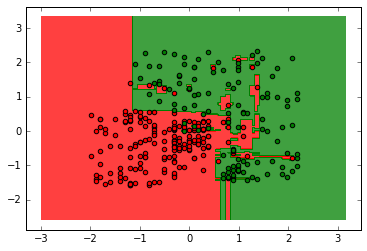

In [16]:
# Visualization
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1 = X_set[:, 0]
X2 = X_set[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
            cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i),
               label=j)

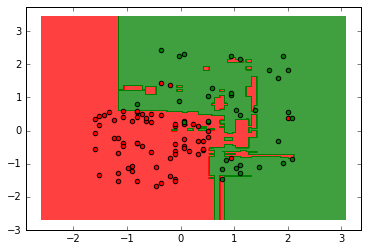

In [17]:
# Visualization
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 = X_set[:, 0]
X2 = X_set[:, 1]
X1, X2 = np.meshgrid(np.arange(X1.min()-1, X1.max()+1, 0.01),
                    np.arange(X2.min()-1, X2.max()+1, 0.01))
X_plot = np.array([X1.ravel(), X2.ravel()])
y_plot = classifier.predict(X_plot.T).reshape(X1.shape)
plt.contourf(X1, X2, y_plot, alpha=0.75, 
            cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i),
               label=j)